## EDD_F2023: Final Project

### TEAM MEMBERS:
#### Riya Rana, Ishitha Singh Kanoj, Tasnia Chowdhury, Carolin Castro

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [2]:
spotify_data = pd.read_csv('Spotify_dataset.csv')

In [3]:
#Dropping the previous index column
spotify_data.drop('Unnamed: 0', axis=1, inplace=True)

### Data collection:

This dataset comprises features for tracks obtained through Spotify's Web API, with tracks labeled as '1' (Hit) or '0' (Flop) based on specific criteria set by the author. The dataset is intended for creating a classification model predicting whether a track is likely to be a hit or not. The 'Flop' label does not imply inferiority but rather suggests non-mainstream or less popular appeal. The dataset includes attributes such as track name, artist, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration, time signature, chorus hit, sections, and the target variable indicating whether the track is a hit ('1') or flop ('0'). The author acknowledges the use of Spotify and Billboard Python modules and attributes the detailed track information to Spotify's API. The 'Flop' categorization is based on several conditions, including absence from the 'hit' list, the artist's absence, belonging to a non-mainstream genre, and not having a genre track in the 'hit' list, with the additional requirement of having 'US' as one of its markets. Further information on attributes is available in the Spotify Web API documentation.

In [4]:
spotify_data

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genres
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.6260,1,-4.826,0,0.0886,0.02000,...,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi..."
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.2470,5,-14.661,0,0.0346,0.87100,...,0.0946,0.250,155.489,176880,3,33.18083,9,0,2010s,"['adult standards', 'easy listening', 'exotica..."
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.4150,9,-6.557,0,0.0520,0.16100,...,0.1080,0.274,172.065,205463,4,44.89147,9,1,2010s,"['danish pop', 'pop', 'scandipop']"
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.6480,0,-5.698,0,0.0527,0.00513,...,0.2040,0.291,91.837,193043,4,29.52521,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet..."
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.8870,1,-3.892,1,0.2750,0.00381,...,0.3910,0.780,160.517,144244,4,24.99199,8,1,2010s,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44889,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.80800,...,0.3630,0.183,119.821,26244,4,0.00000,2,0,1960s,['spytrack']
44890,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.66300,...,0.1070,0.834,135.104,142987,4,28.34316,10,0,1960s,['halloween']
44891,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.94000,...,0.1150,0.139,92.472,137200,4,56.63498,6,0,1960s,"['adult standards', 'bossa nova', 'brazilian c..."
44892,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.65800,...,0.7380,0.853,137.976,159107,3,28.24372,9,0,1960s,"['forro', 'forro tradicional']"


The dataset comprises distinct groups of musical attributes, each providing specific insights into the characteristics of tracks. These groups encompass acoustic attributes such as 'Acousticness' and 'Instrumentalness,' rhythmic elements like 'Danceability,' 'Liveness,' and 'Tempo,' as well as tonal aspects such as 'Energy' and 'Valence.' Structural attributes including 'Duration (ms),' 'Time Signature,' and 'Sections' define the length and musical arrangement. Additionally, performance metrics like 'Loudness,' 'Speechiness,' and 'Chorus Hit' offer insights into volume, vocal presence, and chorus impact. Finally, the dataset includes a crucial binary 'Target' variable indicating whether a track is classified as a 'hit' or 'non-hit.'

### Data Specifics:

In [5]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44894 entries, 0 to 44893
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             44894 non-null  object 
 1   artist            44894 non-null  object 
 2   uri               44894 non-null  object 
 3   danceability      44894 non-null  float64
 4   energy            44894 non-null  float64
 5   key               44894 non-null  int64  
 6   loudness          44894 non-null  float64
 7   mode              44894 non-null  int64  
 8   speechiness       44894 non-null  float64
 9   acousticness      44894 non-null  float64
 10  instrumentalness  44894 non-null  float64
 11  liveness          44894 non-null  float64
 12  valence           44894 non-null  float64
 13  tempo             44894 non-null  float64
 14  duration_ms       44894 non-null  int64  
 15  time_signature    44894 non-null  int64  
 16  chorus_hit        44894 non-null  float6

In [6]:
spotify_data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genres
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,0.0828,0.706,108.029,188493,4,41.18681,10,1,2010s,"['alt z', 'canadian contemporary r&b', 'canadi..."
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,...,0.0946,0.250,155.489,176880,3,33.18083,9,0,2010s,"['adult standards', 'easy listening', 'exotica..."
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,0.1080,0.274,172.065,205463,4,44.89147,9,1,2010s,"['danish pop', 'pop', 'scandipop']"
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,...,0.2040,0.291,91.837,193043,4,29.52521,7,0,2010s,"['bass trap', 'edm', 'electronic trap', 'livet..."
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,...,0.3910,0.780,160.517,144244,4,24.99199,8,1,2010s,NaN


In [7]:
spotify_data.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genres
44889,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,...,0.363,0.183,119.821,26244,4,0.00000,2,0,1960s,['spytrack']
44890,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,...,0.107,0.834,135.104,142987,4,28.34316,10,0,1960s,['halloween']
44891,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,...,0.115,0.139,92.472,137200,4,56.63498,6,0,1960s,"['adult standards', 'bossa nova', 'brazilian c..."
44892,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,...,0.738,0.853,137.976,159107,3,28.24372,9,0,1960s,"['forro', 'forro tradicional']"
44893,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,...,0.136,0.428,131.401,164227,4,37.39251,8,0,1960s,"['deep free jazz', 'mambo']"


In [8]:
spotify_data.shape

(44894, 21)

In [9]:
spotify_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,44894.000000,4.489400e+04,44894.000000,44894.000000,44894.000000,44894.000000
mean,0.538867,0.578835,5.225999,-10.243482,0.690360,0.072715,0.363654,0.153863,0.200709,0.541235,119.156984,2.346863e+05,3.893950,40.101712,10.469706,0.504856
std,0.179075,0.252753,3.534036,5.300971,0.462351,0.084978,0.339756,0.302583,0.171878,0.268163,29.112447,1.186871e+05,0.423932,19.010411,4.866370,0.499982
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.418000,0.396000,2.000000,-12.827000,0.000000,0.033700,0.038800,0.000000,0.093900,0.327000,97.244000,1.728165e+05,4.000000,27.594305,8.000000,0.000000
50%,0.552000,0.600000,5.000000,-9.288500,1.000000,0.043400,0.256000,0.000126,0.132000,0.557000,117.269500,2.179870e+05,4.000000,35.803260,10.000000,1.000000
75%,0.670000,0.787000,8.000000,-6.405000,1.000000,0.069800,0.676000,0.061500,0.260000,0.768000,136.150750,2.668000e+05,4.000000,47.603603,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


### Data Exploration:

#### Working with duplicates

In [10]:
#Finding true duplicates based on 'genre' column
true_duplicates = spotify_data[spotify_data.duplicated(subset=['genres'], keep=False)]

print('True Duplicates: \n')
print(true_duplicates)

True Duplicates: 

                                     track                          artist  \
0                              Wild Things                    Alessia Cara   
1                                Surfboard                       Esquivel!   
2                             Love Someone                    Lukas Graham   
3      Music To My Ears (feat. Tory Lanez)                   Keys N Krates   
4            Juju On That Beat (TZ Anthem)  Zay Hilfigerrr & Zayion McCall   
...                                    ...                             ...   
44889                      Le ire di Ursus              Giampiero Boneschi   
44890                                A-B-C                   John Zacherle   
44891                    Useless Landscape            Antônio Carlos Jobim   
44892                    Vendedor De Assaí                        Ary Lobo   
44893       Mambo Simphony - Remasterizado     Orquesta Casino De La Playa   

                                        uri 

In [11]:
#Finding true duplicates based on 'uri' column
true_duplicates = spotify_data[spotify_data.duplicated(subset=['uri'], keep=False)]

print('True Duplicates: \n')
print(true_duplicates)

True Duplicates: 

                                   track              artist  \
15                         Hotline Bling               Drake   
16                         Hotline Bling               Drake   
17                         Hotline Bling               Drake   
57             Brethren of the Pentagram             Lock Up   
58             Brethren of the Pentagram             Lock Up   
...                                  ...                 ...   
44874     Gaude Felix. Master Cistercium         Traditional   
44875     Gaude Felix. Master Cistercium         Traditional   
44876        Smile A Little Smile For Me  The Flying Machine   
44884  House For Everyone - Mono Version             Traffic   
44885  House For Everyone - Mono Version             Traffic   

                                        uri  danceability  energy  key  \
15     spotify:track:0wwPcA6wtMf6HUMpIRdeP7         0.891   0.625    2   
16     spotify:track:0wwPcA6wtMf6HUMpIRdeP7         0.891   0.62

In [12]:
#Finding duplicates based on the 'track' column
track_duplicates = spotify_data.groupby("track").size().reset_index(name='track_count')

#Display rows where 'track_count' is greater than 1, indicating duplicates
duplicates = track_duplicates[track_duplicates['track_count'] > 1]
print("Duplicates in the dataset:")
print(duplicates)

Duplicates in the dataset:
                                track  track_count
5        "Joseph, lieber Joseph mein"            2
21                'Buked and Scorned'            2
25                    'Round Midnight            3
27                               'Til            5
33       'Tis The Last Rose Of Summer            2
...                               ...          ...
35770                  Спокойная ночь            5
35771  Черная Rock-n-Roll мама - Live            2
35779                      את לי לילה            2
35843                            アルミナ            5
35853                           焼け野が原            2

[5528 rows x 2 columns]


Above we can see all the duplicates by the URI and track count.

In [13]:
#Dropping the genres column as it is not needed for our hypothesis
spotify_data.drop('genres', axis=1, inplace=True)

In [14]:
#Counting the number of duplicate rows based on the uri
duplicates = spotify_data['uri'].duplicated().sum()

print(f'The number of duplicates in the "Uri" column is: {duplicates}')

The number of duplicates in the "Uri" column is: 4334


In [15]:
#Dropping the duplicates baseed on the uri and keeping the first value by default
dataset_no_dups = spotify_data.drop_duplicates(subset=['uri'])

In [16]:
#Checking if there are still duplicates
num_duplicates = dataset_no_dups.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


#### Exploring the data with no duplicates

In [17]:
#Counting the number of hits and non-hits
hit_counts = dataset_no_dups['target'].value_counts()

print("Number of Hits:", hit_counts[1])
print("Number of Non-Hits:", hit_counts[0])

Number of Hits: 20025
Number of Non-Hits: 20535


In [18]:
# Selecting the columns for analysis
columns_of_interest = ['danceability', 'energy', 'valence', 'instrumentalness', 'speechiness', 'target']

# Calculating the correlation matrix
correlation_matrix = dataset_no_dups[columns_of_interest].corr()

# Extracting correlation values with the target variable
correlation_with_target = correlation_matrix['target']

# Outputting the correlation values
print("Correlation with Target Variable:")
correlation_with_target

Correlation with Target Variable:


danceability        0.346252
energy              0.175895
valence             0.251343
instrumentalness   -0.405864
speechiness        -0.040518
target              1.000000
Name: target, dtype: float64

These correlation coefficients serve as indicators of the linear connection between each attribute and the 'target' variable, allowing us to better understand their relationships:

Danceability displays a moderate positive correlation of around 0.355 with the 'target' variable, suggesting that tracks with higher danceability might have a slightly better chance of being hits.

Energy exhibits a weaker positive relationship, with a correlation of approximately 0.172 with the 'target' variable, compared to danceability.

Valence shows a similar moderate positive correlation of about 0.264 with the 'target' variable, hinting that tracks with higher valence might also have a slightly increased likelihood of being hits.

Instrumentalness reveals a robust negative correlation of approximately -0.411 with the 'target' variable, implying that tracks with lower instrumentalness are more likely to be hits.

Speechiness, on the other hand, demonstrates a very weak negative correlation of around -0.036 with the 'target' variable, indicating an extremely minimal negative relationship that might not hold statistical significance.

In essence, these correlation coefficients unveil how each attribute linearly relates to the likelihood of a track being classified as a hit. Notably, lower instrumentalness strongly associates with a higher probability of a track being a hit, while danceability and valence exhibit moderate positive correlations."

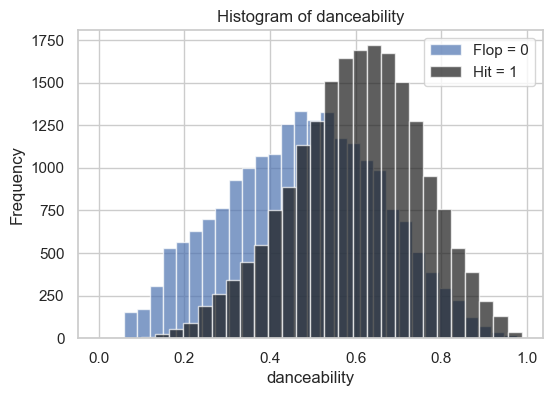

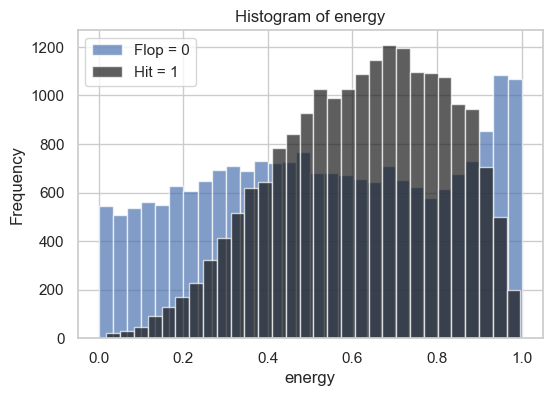

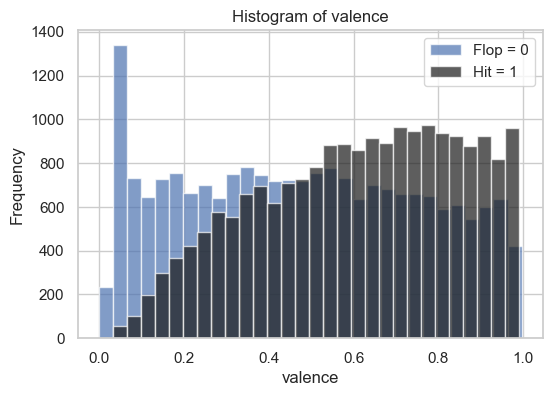

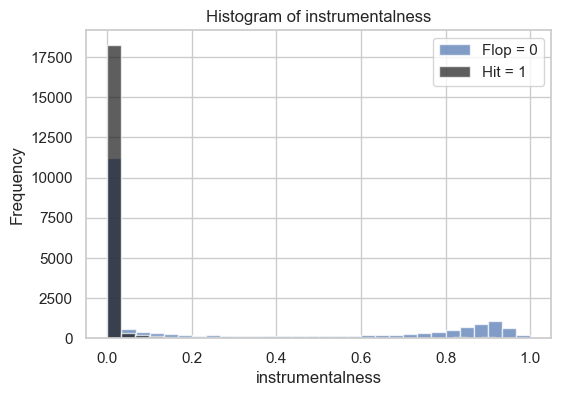

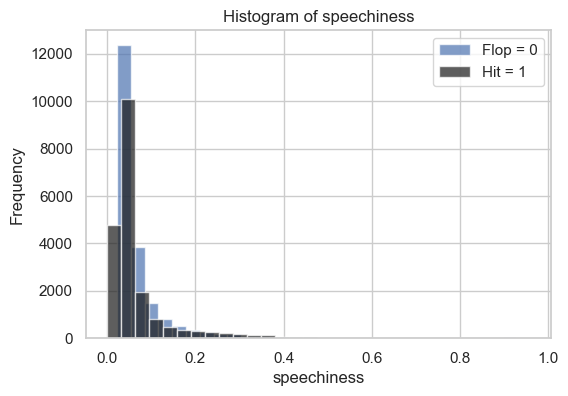

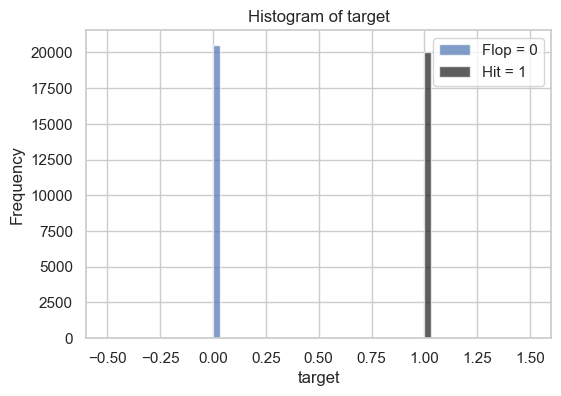

In [24]:
for column in columns_of_interest:
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    plt.hist(
        dataset_no_dups[dataset_no_dups['target'] == 0][column], bins=30, alpha=0.7, color='b', label='Flop = 0'
    )
    plt.hist(
        dataset_no_dups[dataset_no_dups['target'] == 1][column], bins=30, alpha=0.7, color='k', label='Hit = 1'
    )
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()

The frequency for each attribute indicates how many occurrences or data points fall within specific ranges or bins for that particular attribute. For example, the distribution of 'danceability,' the frequency represents the count of songs falling within different danceability ranges (e.g., high danceability, moderate danceability, low danceability). Likewise, for 'energy,' 'valence,' or any other characteristic, the frequency signifies the quantity of tracks or data points that fall into each category 

In [20]:
#Selecting the columns for the model
columns_of_interest = ['danceability', 'energy', 'valence', 'instrumentalness', 'speechiness']

#Adding constant term for the intercept
X = sm.add_constant(dataset_no_dups[columns_of_interest])
y = dataset_no_dups['target']

#Creating and fitting the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

#Printing the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.547666
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                40560
Model:                          Logit   Df Residuals:                    40554
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.2098
Time:                        19:15:46   Log-Likelihood:                -22213.
converged:                       True   LL-Null:                       -28111.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9987      0.049    -40.581      0.000      -2.095      -1.902
danceabilit

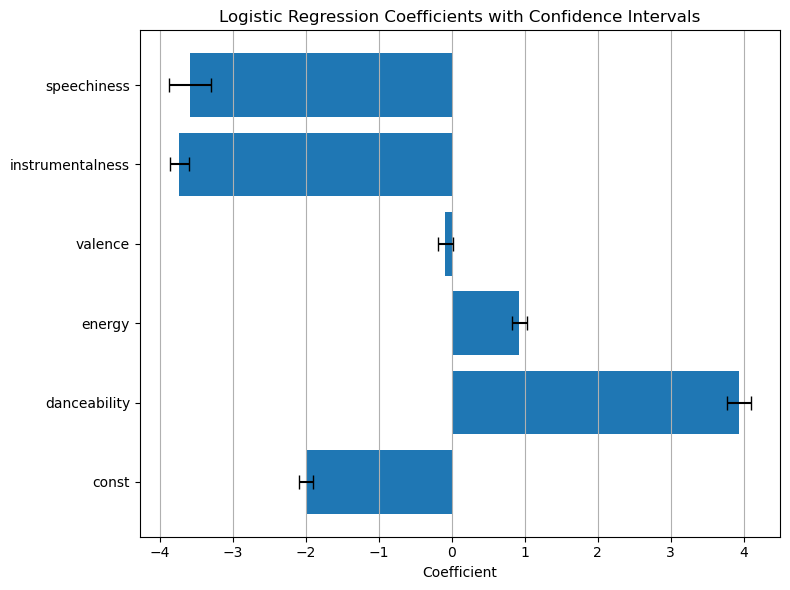

In [21]:
#Coefficients and standard errors
coef = [-1.9987, 3.9319, 0.9239, -0.0883, -3.7347, -3.5906]
std_err = np.array([0.049, 0.085, 0.051, 0.055, 0.066, 0.148])
labels = ['const', 'danceability', 'energy', 'valence', 'instrumentalness', 'speechiness']

#Creating a bar plot
plt.figure(figsize=(8, 6))
plt.barh(labels, coef, xerr=std_err*1.96, capsize=5)
plt.xlabel('Coefficient')
plt.title('Logistic Regression Coefficients with Confidence Intervals')
plt.grid(axis='x')
plt.tight_layout()

plt.show()

Interpretation:

In relation to our hypothesis examining attributes impacting a track's likelihood of being a hit, these logistic regression results offer insights into each attribute's influence.

Danceability and energy exhibit positive effects: higher danceability and energy tend to increase the likelihood of a track being a hit.
For instance, a unit increase in danceability corresponds to an approximately 3.93 times higher odds of a track being a hit, while a similar increase in energy corresponds to about 0.92 times higher odds.

However, valence, the measure of musical positivity, doesn't seem to significantly affect a track's hit potential as indicated by the coefficient close to zero (-0.0883) even though the p-value is over the 0.05 threshold.

Conversely, instrumentalness and speechiness hold significant influence: lower instrumentalness (indicating less instrumental music) and lower speechiness (less spoken words) are strongly associated with higher chances of a track becoming a hit.
A decrease in instrumentalness by one unit corresponds to around 3.73 times higher odds of a track being a hit, while a decrease in speechiness by one unit relates to about 3.60 times higher odds.

These findings provide clear indications of the attributes that distinctly shape a track's potential to become a hit. Emphasizing the significant impact of instrumentalness and speechiness on a track's likelihood of becoming a hit, while danceability and energy also play crucial roles but to a slightly lesser extent.

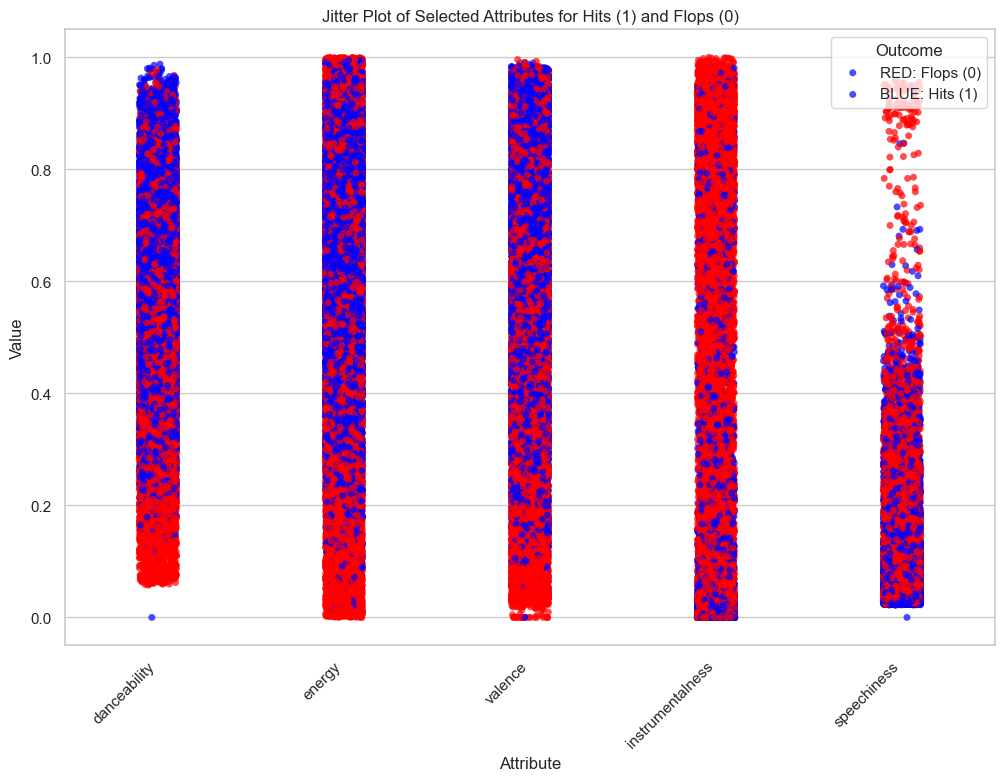

In [23]:
columns_of_interest = ['danceability', 'energy', 'valence', 'instrumentalness', 'speechiness', 'target']

#Creating a DataFrame with selected columns
df_selected = dataset_no_dups[columns_of_interest]

#Reshaping the DataFrame using the melt function
df_melted = pd.melt(df_selected, id_vars=['target'], var_name='attribute', value_name='value')

#Creating a custom color palette for hits (1) and flops (0)
custom_palette = {0: "red", 1: "blue"}

#Creating a jitter plot using Seaborn's stripplot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.stripplot(x='attribute', y='value', hue='target', data=df_melted, jitter=True, alpha=0.7, palette=custom_palette)

#Customizing labels and title
plt.xlabel("Attribute")
plt.ylabel("Value")
plt.title("Jitter Plot of Selected Attributes for Hits (1) and Flops (0)")
plt.legend(title="Outcome", labels=['RED: Flops (0)', 'BLUE: Hits (1)'])

#Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

The jitter plot showcases the relationship between several music attributes (danceability, energy, valence, instrumentalness, speechiness) and the likelihood of a track being a hit or a flop. Each dot on the plot represents a song in our dataset, positioned based on its attribute value. The x-axis displays these attributes, while the y-axis represents their respective values. The colors distinguish between 'hits' and 'flops,' with hits marked in blue and flops in red. This visualization helps us observe trends or patterns in attribute values concerning the target variable. For instance, we can see that songs labeled as hits (in blue) tend to have higher danceability and energy compared to the songs labeled as flops (in red), suggesting a potential correlation between these attributes and a track's success.